In [18]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
data_train, data_test = mnist.load_data()
train_images, train_labels = data_train
test_images, test_labels = data_test

In [19]:
print('train_images.shape =', train_images.shape)
print('test_images.shape=', test_images.shape)
print('train_labels.shape=', train_labels.shape)
print('test_labels.shape=', test_labels.shape)

train_images.shape = (60000, 28, 28)
test_images.shape= (10000, 28, 28)
train_labels.shape= (60000,)
test_labels.shape= (10000,)


In [20]:
num = train_images[0]
for i in range(28):
    for j in range(28):
        print('{:4d}'.format(num[i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

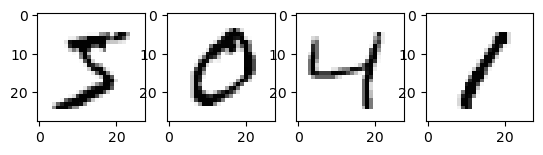

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

ax1.imshow(train_images[0], cmap='Greys')
ax2.imshow(train_images[1], cmap='Greys')
ax3.imshow(train_images[2], cmap='Greys')
ax4.imshow(train_images[3], cmap='Greys')

In [22]:
print('train_labels[:4] =', train_labels[:4])

train_labels[:4] = [5 0 4 1]


In [23]:
#입력값 전처리: 0에서 1 사이의 값으로 입력 데이터를 가공함
train_images, test_images = train_images / 255, test_images / 255

In [24]:
#다층 신경망 구성
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [26]:
#최적화 알고리즘/손실함수/평가지표 등을 설정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 729us/step - loss: 0.2241 - accuracy: 0.9352
Epoch 2/5
1875/1875 [==============================] - 1s 722us/step - loss: 0.0933 - accuracy: 0.9721
Epoch 3/5
1875/1875 [==============================] - 1s 730us/step - loss: 0.0623 - accuracy: 0.9806
Epoch 4/5
1875/1875 [==============================] - 1s 731us/step - loss: 0.0451 - accuracy: 0.9862
Epoch 5/5
1875/1875 [==============================] - 1s 703us/step - loss: 0.0336 - accuracy: 0.9894


In [28]:
model.save('./simple_model.keras')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('테스트 정확도: ', test_acc)

313/313 - 0s - loss: 0.0703 - accuracy: 0.9773 - 213ms/epoch - 680us/step
테스트 정확도:  0.9772999882698059


성능 향상을 위해 일반적으로 사용하는 방법
1. 학습을 위한 은닉층 더 깊게 만들기
2. epoch 증가시키기
3. 많은 학습용 데이터를 사용하기
4. 하이퍼파라미터 튜닝하기

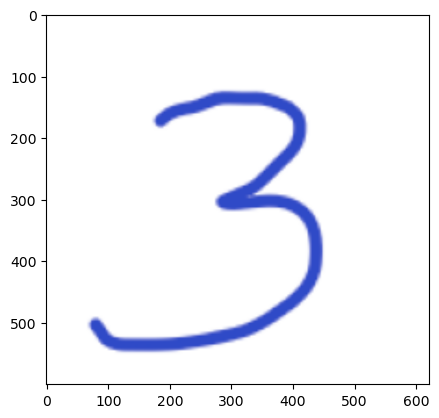

In [29]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('./myNumber.png')
plt.imshow(img)

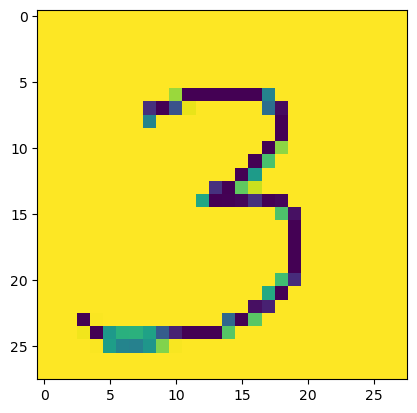

In [30]:
#위 이미지는 28x28 크기도 아니고 grayscale도 아니어서 우리가 학습한 모델에 바로 적용 불가.
#grayscale 단일 채널 이미지로 변경하기 위해 open cv 사용
import cv2
img = cv2.imread('./myNumber.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28,28))
plt.imshow(img)

In [31]:
model = keras.models.load_model('./simple_model.keras')
pred = model.predict(img[np.newaxis, :, :])
pred.argmax()

1/1 [==============================] - 0s 51ms/step


7

In [32]:
for i in range(28):
    for j in range(28):
        print('{:4d}'.format(img[i][j]), end='')
    print()

 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 229  80  80  80  80  80  80 158 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 104  80 124 249 255 255 255 255 255 143  85 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 159 255 255 255 255 255 255 255 255 255  80 255 255 255 255 255

In [33]:
#이미지의 색상을 반전시키고 0~1 사이의 실수로 만들기
img = (255 - img) / 255
pred = model.predict(img[np.newaxis, :, :])
pred.argmax()

1/1 [==============================] - 0s 45ms/step


3